In [148]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('float_format', '{:f}'.format)
dataframes = {}

In [149]:
dataframe_eu_west = pd.read_json('results/results-5gb/133132736141.dkr.ecr.eu-west-1.amazonaws.com-results.json')
dataframes['ecr-eu-west'] = dataframe_eu_west
dataframe_eu_west

,onTime,time,duration,document_type,method,size
0,yes,1604251429.071097,1.959227,layer,GET,75089078
1,yes,1604251429.097228,0.378291,manifest,GET,2415
2,yes,1604251429.100593,0.337168,manifest,GET,535
3,yes,1604251429.103222,0.807418,layer,GET,17147613
4,yes,1604251429.106208,0.420044,manifest,GET,3254
...,...,...,...,...,...,...
400,yes,1604251458.691570,0.231188,layer,GET,2073
401,yes,1604251429.114813,0.353232,manifest,GET,2643
402,yes,1604251462.006930,0.235963,layer,GET,6927
403,yes,1604251429.111690,0.662320,layer,GET,2198802


In [150]:
dataframe_eu_west = dataframe_eu_west.sort_values(by=['time'])
dataframe_eu_west["time"] = dataframe_eu_west["time"] - dataframe_eu_west["time"].iloc[0]
dataframe_eu_west["arrival_time"] = dataframe_eu_west["time"] + dataframe_eu_west["duration"]
eu_west_get = dataframe_eu_west["duration"].mean()
eu_west_get_manifest = dataframe_eu_west[dataframe_eu_west["document_type"] == "manifest"]["duration"].mean()


,onTime,time,duration,document_type,method,size
0,yes,1604251429.071097,1.959227,layer,GET,75089078
1,yes,1604251429.097228,0.378291,manifest,GET,2415
2,yes,1604251429.100593,0.337168,manifest,GET,535
3,yes,1604251429.103222,0.807418,layer,GET,17147613
4,yes,1604251429.106208,0.420044,manifest,GET,3254
...,...,...,...,...,...,...
400,yes,1604251458.691570,0.231188,layer,GET,2073
401,yes,1604251429.114813,0.353232,manifest,GET,2643
402,yes,1604251462.006930,0.235963,layer,GET,6927
403,yes,1604251429.111690,0.662320,layer,GET,2198802


In [141]:
sum = dataframe_eu_west["time"] + dataframe_eu_west["duration"]
duration = sum.max()
#dataframe_eu_west["time"].iloc[-1
dataframe_eu_west_throughput = len(dataframe_eu_west.index) / duration
dataframe_eu_west_throughput

12.17354708248945

In [144]:
dataframe_eu_central = pd.read_json('results/results-5gb/133132736141.dkr.ecr.eu-central-1.amazonaws.com-results.json')
eu_central_get = dataframe_eu_central["duration"].mean()
eu_central_get_manifest = dataframe_eu_central[dataframe_eu_central["document_type"] == "manifest"]["duration"].mean()
dataframe_eu_central = dataframe_eu_central.sort_values(by=['time'])
dataframe_eu_central["time"] = dataframe_eu_central["time"] - dataframe_eu_central["time"].iloc[0]
dataframe_eu_central["arrival_time"] = dataframe_eu_central["time"] + dataframe_eu_central["duration"]
dataframe_eu_central = dataframe_eu_central.sort_values(by=['arrival_time'])

sum = dataframe_eu_central["time"] + dataframe_eu_central["duration"]
duration = sum.max()
#dataframe_eu_west["time"].iloc[-1
dataframe_eu_central_throughput = len(dataframe_eu_central.index) / duration
dataframe_eu_central_throughput


12.232090128035368

In [134]:
dataframe_us_west = pd.read_json('results/results-5gb/133132736141.dkr.ecr.us-west-1.amazonaws.com-results.json')
dataframe_us_west

,onTime,time,duration,document_type,method,size
0,yes,1604252629.209565,6.509473,layer,GET,75089078
1,yes,1604252629.239437,1.871557,manifest,GET,2416
2,yes,1604252629.242401,1.860590,manifest,GET,536
3,yes,1604252629.243580,3.640911,layer,GET,17147613
4,yes,1604252629.246650,1.863983,manifest,GET,3253
...,...,...,...,...,...,...
400,yes,1604252660.366166,1.255488,layer,GET,2071
401,yes,1604252629.244888,1.898406,manifest,GET,2643
402,yes,1604252663.734306,1.241480,layer,GET,6928
403,yes,1604252629.239798,3.118222,layer,GET,2198802


In [135]:
us_west_get = dataframe_us_west["duration"].mean()
us_west_get_manifest = dataframe_us_west[dataframe_us_west["document_type"] == "manifest"]["duration"].mean()

In [136]:
dataframe_us_east = pd.read_json('results/results-5gb/133132736141.dkr.ecr.us-east-1.amazonaws.com-results.json')
us_east_get = dataframe_us_east["duration"].mean()
us_east_get_manifest = dataframe_us_east[dataframe_us_east["document_type"] == "manifest"]["duration"].mean()
dataframe_us_east

,onTime,time,duration,document_type,method,size
0,yes,1604252179.925756,4.563481,layer,GET,75089078
1,yes,1604252179.931122,1.261771,manifest,GET,2415
2,yes,1604252179.932465,1.318836,manifest,GET,535
3,yes,1604252179.933726,2.578491,layer,GET,17147613
4,yes,1604252179.935266,1.322050,manifest,GET,3253
...,...,...,...,...,...,...
400,yes,1604252210.534681,0.887411,layer,GET,2073
401,yes,1604252179.929886,1.279668,manifest,GET,2643
402,yes,1604252213.855901,0.877679,layer,GET,6927
403,yes,1604252179.928787,1.950188,layer,GET,2198801


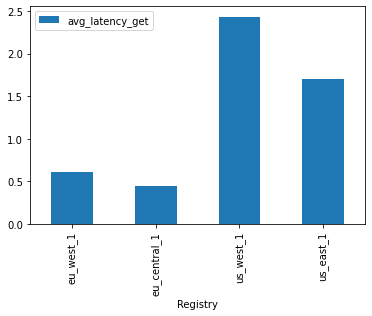

In [137]:
Data = { 'Registry': ['eu_west_1', 'eu_central_1', 'us_west_1', 'us_east_1'], 'avg_latency_get': [eu_west_get, eu_central_get, us_west_get, us_east_get] }
df = pd.DataFrame(Data,columns=['Registry','avg_latency_get'])
df.plot(x='Registry', y='avg_latency_get', kind='bar')

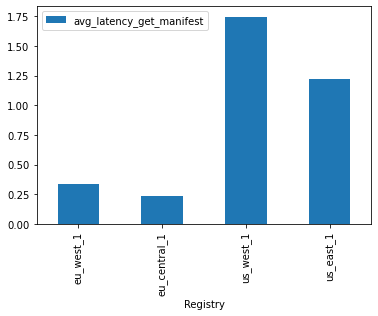

In [138]:
Data_manifest = { 'Registry': ['eu_west_1', 'eu_central_1', 'us_west_1', 'us_east_1'], 'avg_latency_get_manifest': [eu_west_get_manifest, eu_central_get_manifest, us_west_get_manifest, us_east_get_manifest] }
df_manifest = pd.DataFrame(Data_manifest,columns=['Registry','avg_latency_get_manifest'])
df_manifest.plot(x='Registry', y='avg_latency_get_manifest', kind='bar')